## 1 - Exploring the Tensorflow Library


In [53]:
!pip install tensorflow==1.14

ERROR: Could not install packages due to an EnvironmentError: [WinError 145] The directory is not empty: 'c:\\users\\it\\anaconda3\\envs\\tensorflow_env\\lib\\site-packages\\~ensorboard'


  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0


In [14]:
a = tf.constant([1, 2, 3, 4, 5, 6], shape=[2, 3])
a  # 2-D tensor

b = tf.constant([7, 8, 9, 10, 11, 12], shape=[3, 2])
b  # 2-D tensor

c = tf.matmul(a, b)
sess = tf.Session()
result = sess.run(c)

sess.close()

print(result)

[[ 39  49  59]
 [ 54  68  82]
 [ 69  87 105]]


In [11]:
c = tf.matmul(b, a, transpose_a=True, transpose_b=True)
sess = tf.Session()
result = sess.run(c)

sess.close()

print(result)

[[ 58 139]
 [ 64 154]]


In [1]:
import math
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
# tf.disable_v2_behavior()
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

C:\Users\IT\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\IT\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\IT\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\IT\AppData\Roaming\Python\Python37\site-packages\ten

In [13]:
tf.version.VERSION

'1.14.0'

Lets compute for you the loss of one training example. 
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 \tag{1}$$

In [14]:
y_hat = tf.constant(36, name='y_hat')          # Define y_hat constant. Set its value to 36.
y = tf.constant(39, name ='y')                 # Define y. Set to 39

loss = tf.Variable((y-y_hat)**2, name ='loss') # Create a variable for the loss

init=tf.global_variables_initializer()         # When init is run later (session.run(init)),
# the loss variable will be initialized and ready to be computed
with tf.Session() as session:                  # Create a session and print the output
    session.run(init)                          # Initializes the variables
    print(session.run(loss))                   # Prints the loss

9


Great! To summarize, **remember to initialize your variables, create a session and run the operations inside the session**. 

A placeholder is an object whose value you can specify only later. 
To specify values for a placeholder, you can pass in values by using a "feed dictionary" (`feed_dict` variable). Below, we created a placeholder for x. This allows us to pass in a number later when we run the session. 

In [15]:
sess = tf.Session()
x = tf.placeholder(tf.int64, name= 'x')
print(sess.run(2 * x, feed_dict = {x: 3}))
sess.close()

6


### 1.1 - Linear function

In [4]:
# Linear Function

def linear_function():
    np.random.seed(1)
    
    W = tf.constant(np.random.randn(4,3), name='W')
    X = tf.constant(np.random.randn(3,1), name='X')
    b = tf.constant(np.random.randn(4,1), name='b')
    
    Y = tf.add(tf.matmul(W,X),b)
    
    sess = tf.Session()
    result = sess.run(Y)
    
    sess.close()
    
    return result


In [5]:
print( "result = " + str(linear_function()))

result = [[-1.98748544]
 [-2.76826248]
 [-0.78635415]
 [-2.77463846]]


### Computing the sigmoid 


In [18]:
def sigmoid(z):
    x = tf.placeholder('float64',name='x')
    z_sig = tf.sigmoid(x)

    with tf.Session() as sess:
        result = sess.run(z_sig, feed_dict={x:z})
    return result

In [19]:
print ("sigmoid(0) = " + str(sigmoid(0)))
print ("sigmoid(12) = " + str(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938558253978


### Computing the Cost

In [24]:
def cost(logits, labels):
    
    z = tf.placeholder(tf.float32, name = "z")
    y = tf.placeholder(tf.float32, name = "y")
    cost = tf.nn.sigmoid_cross_entropy_with_logits(logits=z, labels=y)
    
    with tf.Session()as sess:
        result = sess.run(cost, feed_dict={z:logits, y:labels})
    
    return result

In [25]:
logits = sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [1.0053873  1.0366408  0.41385433 0.39956617]


### One hot Encoding

In [26]:
def one_hot_matrix(labels, C):
    
    l = tf.placeholder('int64', name='l')
    
    one_hot = tf.one_hot(labels,C, axis=0)
    with tf.Session() as sess:
        result = sess.run(one_hot, feed_dict={l:labels})
        
    return result

In [27]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C=4)
print ("one_hot = " + str(one_hot))

one_hot = [[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


### Initialize with zeros and ones


In [28]:
def ones(shape):
    
    one_matrix = tf.ones(shape)
    
    with tf.Session() as sess:
        result = sess.run(one_matrix)
    return result


In [29]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


# Building your first neural network in tensorflow

In [30]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 5


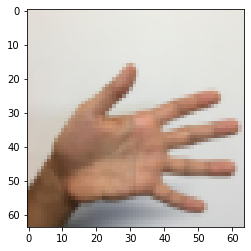

In [31]:
# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [32]:
X_train_orig.shape

(1080, 64, 64, 3)

In [33]:
# Flatten each array
X_train_flatten= X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

# Normalize image vectors
X_train = X_train_flatten/255
X_test = X_test_flatten/255

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


**Note** that 12288 comes from $64 \times 64 \times 3$. Each image is square, 64 by 64 pixels, and 3 is for the RGB colors. 

**The model** is *LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX*. The SIGMOID output layer has been converted to a SOFTMAX. A SOFTMAX layer generalizes SIGMOID to when there are more than two classes. 

### Create placeholders


In [52]:
def create_placeholders(n_x, n_y):
    
    X = tf.placeholder('float32',shape=[n_x,None], name='X')
    Y = tf.placeholder('float32', shape=[n_y,None], name='Y')
    
    return X,Y

In [53]:
X, Y = create_placeholders(12288, 6)
print ("X = " + str(X))
print ("Y = " + str(Y))

X = Tensor("X_1:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(6, ?), dtype=float32)


### Initializing the parameters


In [46]:
def initialize_parameters():
    
    tf.set_random_seed(1)   
    parameters = {}
    W1 = tf.get_variable("W1", [25,12288], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b1 = tf.get_variable("b1", [25,1], initializer = tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b2 = tf.get_variable("b2", [12,1], initializer = tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6,12], initializer = tf.contrib.layers.xavier_initializer(seed = 1))
    b3 = tf.get_variable("b3", [6,1], initializer = tf.zeros_initializer())
    
    parameters={'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2, 'W3':W3, 'b3':b3}
    return parameters


In [47]:
tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


### Forward propagation in tensorflow 


In [50]:
def forward_propagation(X, parameters):
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    a1 = tf.nn.relu(tf.add(tf.matmul(W1,X),b1))
    a2 = tf.nn.relu(tf.add(tf.matmul(W2,a1),b2))
    z3 = tf.add(tf.matmul(W3,a2),b3)
    
    return z3
    

In [54]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


In [20]:
np.eye(6)[[5,0,2]]

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [23]:
2.94109e-06


2.94109e-06

### Compute cost


In [58]:
def compute_cost(Z3, Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=labels, logits=logits))
    
    return cost

In [59]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

cost = Tensor("Mean:0", shape=(), dtype=float32)


### Backward propagation & parameter updates


### Building the model


In [62]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 1500, minibatch_size = 32, print_cost = True):
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.set_random_seed(1)                             # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    # Create Placeholders of shape (n_x, n_y)
    X,Y = create_placeholders(n_x,n_y)
    
    # Initialize parameters
    parameters = initialize_parameters()
    
    # Forward propagation: Build the forward propagation in the tensorflow graph
    Z3 = forward_propagation(X, parameters)
    
    # Cost function: Add cost function to tensorflow graph
    cost = compute_cost(Z3, Y)
    
    # Backpropagation: Define the tensorflow optimizer. Use an AdamOptimizer.
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # Initialize all the variables
    init = tf.global_variables_initializer()
    
    # Start the session to compute the tensorflow graph
    with tf.Session() as sess:
        # Run the initialization
        sess.run(init)
        
        # Do the training loop
        for epoch in range(num_epochs):
            epoch_cost = 0.                       # Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)
            
            for minibatch in minibatches:
                
                # Select a minibatch
                (minibatch_X, minibatch_Y) = minibatch
                
                # IMPORTANT: The line that runs the graph on a minibatch.
                # Run the session to execute the "optimizer" and the "cost", the feedict should contain a minibatch for (X,Y).
                _,minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})

                epoch_cost += minibatch_cost / num_minibatches
                
            # Print the cost every epoch
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)
                
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
    
        # lets save the parameters in a variable
        parameters = sess.run(parameters)
        print ("Parameters have been trained!")
        
        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
        
        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters
                





Cost after epoch 0: 1.855702
Cost after epoch 100: 1.017255
Cost after epoch 200: 0.733184
Cost after epoch 300: 0.573071
Cost after epoch 400: 0.468573
Cost after epoch 500: 0.381228
Cost after epoch 600: 0.313815
Cost after epoch 700: 0.253708
Cost after epoch 800: 0.203900
Cost after epoch 900: 0.166454
Cost after epoch 1000: 0.146636
Cost after epoch 1100: 0.107279
Cost after epoch 1200: 0.086698
Cost after epoch 1300: 0.059342
Cost after epoch 1400: 0.052289


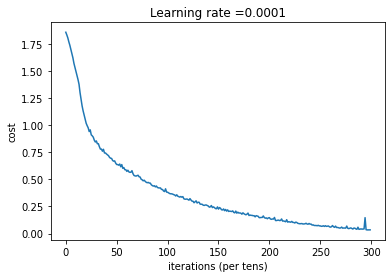

Parameters have been trained!
Train Accuracy: 0.9990741
Test Accuracy: 0.725


In [63]:
parameters = model(X_train, Y_train, X_test, Y_test)